<a href="https://colab.research.google.com/github/Alleyss/iris_flower_pattern/blob/main/iris_flowers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Explore the Dataset:

In [ ]:
import pandas as pd


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(iris_data.head())
#Data consists of 150 rows and 5 columns. The columns consists of information of sepal_length,sepal_width,petal_length,petal_width,class of the iris flower.

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Preprocess the Data:


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
iris_data["class"] = le.fit_transform(iris_data["class"])


Split the Data into Training and Testing Sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = iris_data.drop("class", axis=1)
y = iris_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build and Train a Classifier:


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


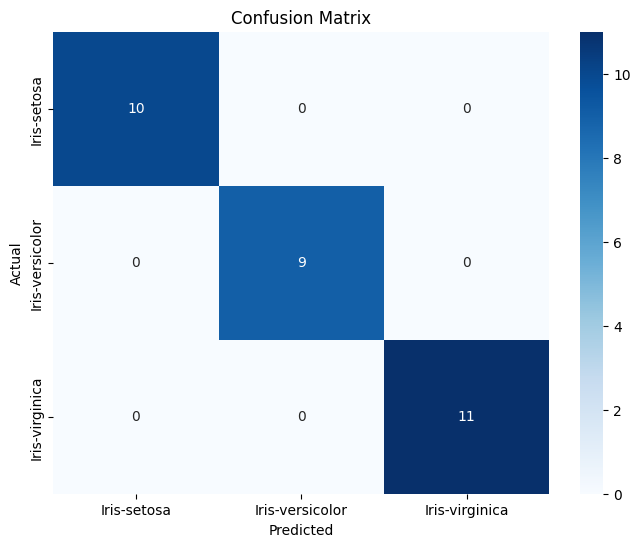

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Visualize the Decision Boundary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-64-a4c8ddb471d8>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1], edgecolors='k', cmap=plt.cm.Paired, label=f'Class {label}')


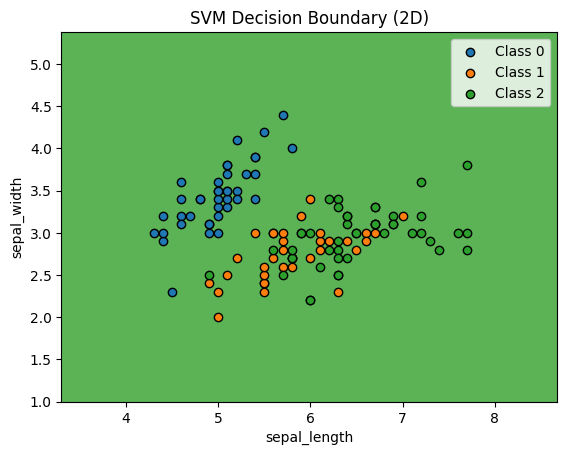

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title, feature_names, class_labels):
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot data points for each class separately with a specific label
    for i, label in enumerate(class_labels):
        class_points = X[y == i]
        plt.scatter(class_points.iloc[:, 0], class_points.iloc[:, 1], edgecolors='k', cmap=plt.cm.Paired, label=f'Class {label}')

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

    # Add legend
    plt.legend(loc='upper right')

    plt.show()

# Plot Decision Boundary (2D)
feature_names_2d = ['sepal_length', 'sepal_width']

# Class labels (assuming 0, 1, 2 for simplicity, adjust based on your actual class labels)
class_labels = [0, 1, 2]

# Create a meshgrid for plotting
x_min, x_max = X_train[feature_names_2d[0]].min() - 1, X_train[feature_names_2d[0]].max() + 1
y_min, y_max = X_train[feature_names_2d[1]].min() - 1, X_train[feature_names_2d[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Make predictions on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot
plot_decision_boundary(X_train[feature_names_2d], y_train, clf, 'SVM Decision Boundary (2D)', feature_names_2d, class_labels)
